In [1]:
import sys
sys.path.append('./../')

import xml.etree.ElementTree as ET
import numpy as np
import ikamoana as ika
import xarray as xr
import matplotlib.pyplot as plt
import os
import parcels

In [2]:
# fh = xr.load_dataarray("./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
# fh.mean(axis=0).plot()

In [3]:
ika_s = ika.IkaSim('./../data/ikamoana_config/IkaSim_Example_OLD.xml')
ika_s.forcing_gen.ikamoana_fields_structure.units="m_per_s"
#ika_s.forcing_gen.ikamoana_fields_structure.diffusion_scale = 1
# ika_s.forcing_gen.ikamoana_fields_structure.diffusion_boost = 1
ika_s.generateForcing(to_file=False)

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [4]:
ika_s.createFieldSet(from_disk=False)

In [6]:
# N = 5000
N=5000
ika_s.initialiseFishParticles(start=None,n_fish=N,pclass=ika.ikafish.ikafish.IkaFishDebug)

Number of fish =  5000


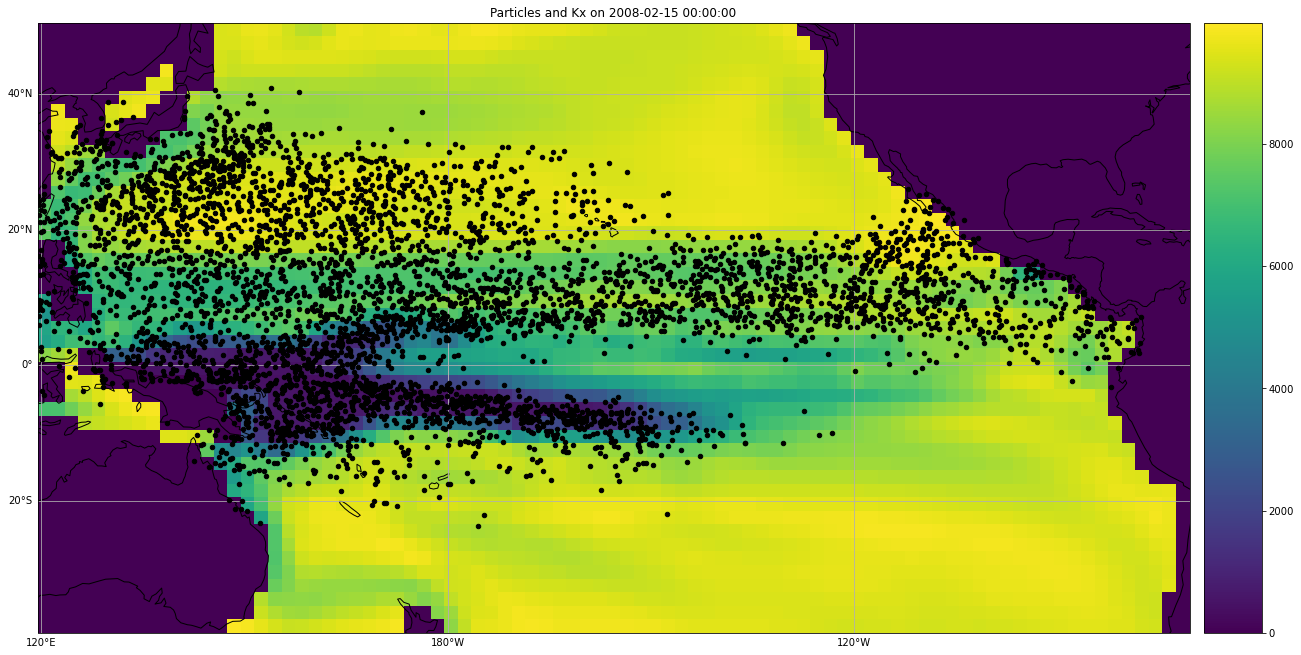

In [7]:
print("Number of fish = ",len(ika_s.fish))
ika_s.fish.show(field=ika_s.ocean.Kx)

In [8]:
#Run the behavioural kernels for two months
ika_s.runKernels(verbose=False, T=720)

INFO: Compiled ArrayIkaFishDebugCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDymMoveAgeLandBlock ==> /tmp/parcels-1000/lib8eacbb06dceb571ab4e97fc4f8d1dcb0_0.so
/home/ash/anaconda3/envs/ikamoana/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


Number of fish =  4633


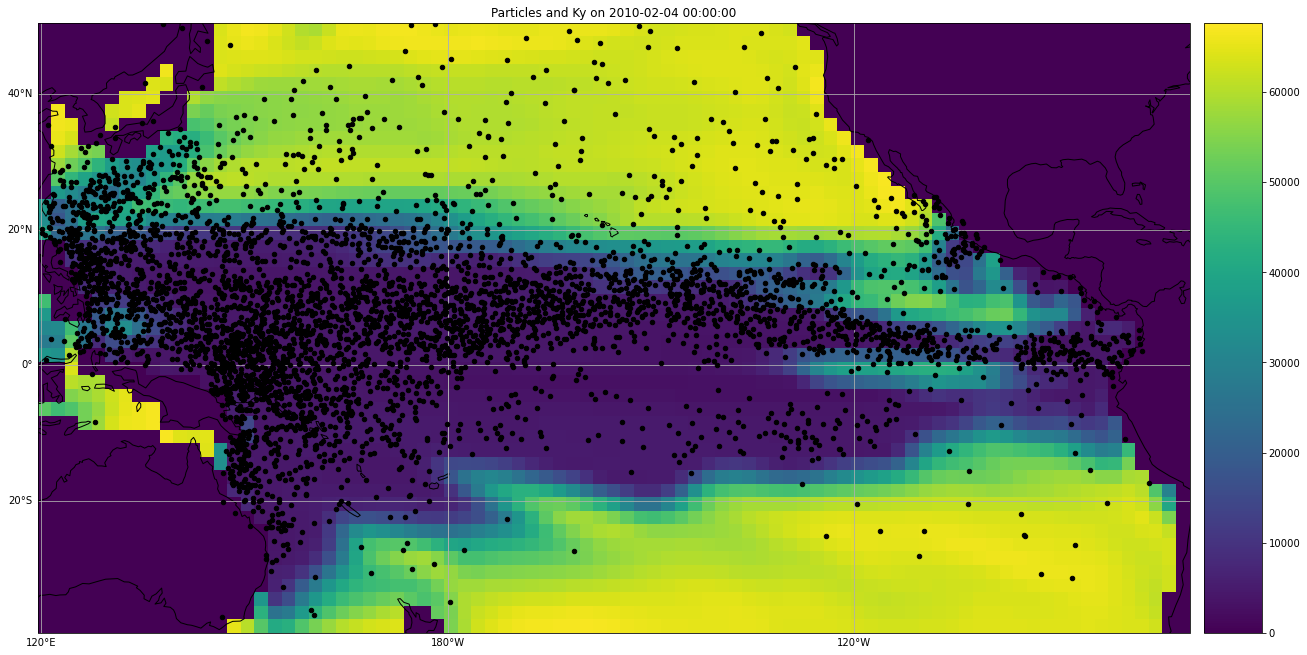

In [9]:
print("Number of fish = ",len(ika_s.fish))

ika_s.fish.show(field=ika_s.ocean.Ky)
# ika_s.fish.show(field="vector")

In [10]:
particle_file = xr.load_dataset("./IkaSim_Example.nc")
particle_file

<xarray.Dataset>
Dimensions:       (traj: 5000, obs: 49)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    trajectory    (traj, obs) float64 0.0 0.0 0.0 ... 4.999e+03 4.999e+03
    time          (traj, obs) datetime64[ns] 2008-02-15 ... 2010-02-04
    lat           (traj, obs) float32 26.27 26.71 26.72 ... -5.498 -4.806 -4.481
    lon           (traj, obs) float32 155.3 155.0 153.5 ... 155.8 156.6 158.5
    z             (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Tx            (traj, obs) float32 0.0 -0.000213 ... 0.002244 0.002673
    ...            ...
    Cx            (traj, obs) float32 0.0 -0.001025 ... 0.02753 0.01789
    Cy            (traj, obs) float32 0.0 0.0006702 ... 0.0006387 0.006258
    Ax            (traj, obs) float32 0.0 -0.1397 -0.153 ... 0.6219 0.6276
    Ay            (traj, obs) float32 0.0 -0.1814 -0.156 ... 0.6636 0.2322
    Rx_component  (traj, obs) float32 0.0 2.716e+05 ... 1.779e+05 1.835e+05
    Ry_component  (traj, obs) float32 0.0 2.713e+05 ... 1.778e+05 1.835e+05
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

In [11]:
mean_Dx = np.absolute(particle_file['Dx']).mean(axis=0)
mean_Dy = np.absolute(particle_file['Dy']).mean(axis=0)
mean_Cx = np.absolute(particle_file['Cx']).mean(axis=0)
mean_Ax = np.absolute(particle_file['Ax']).mean(axis=0)
mean_Tx = np.absolute(particle_file['Tx']).mean(axis=0)

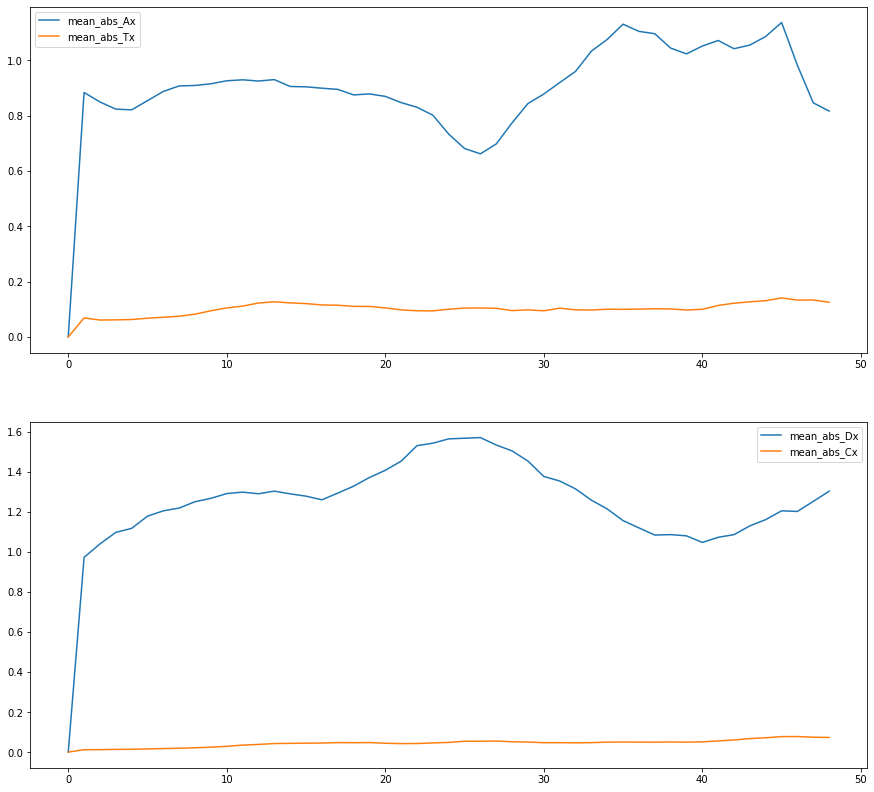

In [12]:
fig, (axe1, axe2) = plt.subplots(2,1,figsize=(15,14))

axe1.plot(mean_Ax)
axe1.plot(mean_Tx)
axe1.legend(["mean_abs_Ax","mean_abs_Tx"])

axe2.plot(mean_Dx)
axe2.plot(mean_Cx)
axe2.legend(["mean_abs_Dx","mean_abs_Cx"])

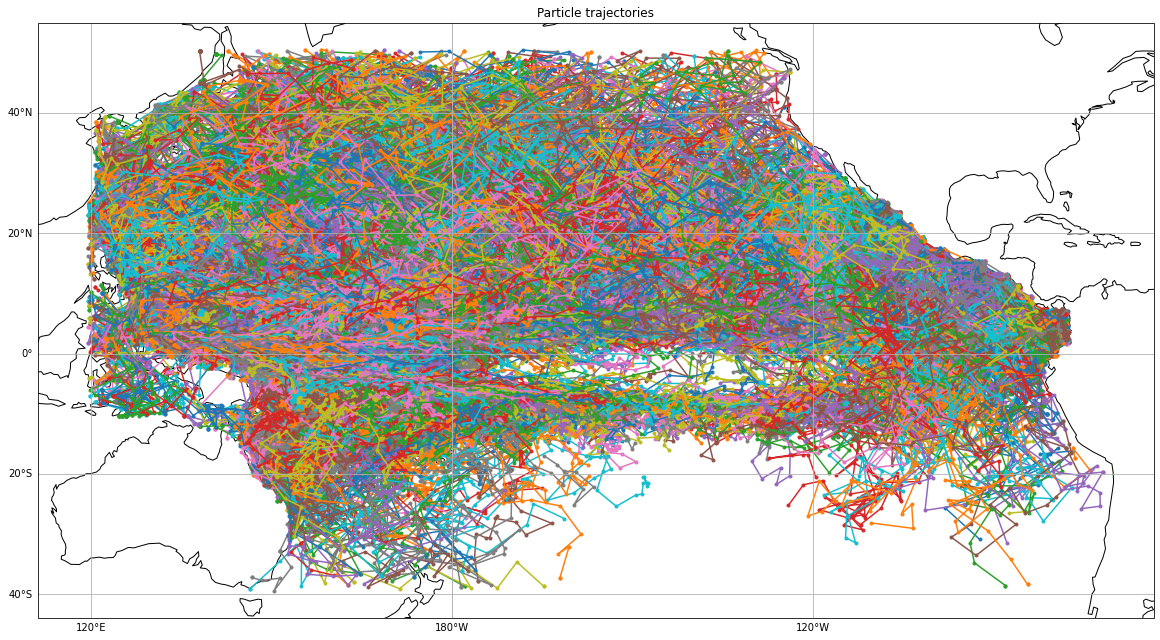

<Figure size 1440x1440 with 0 Axes>

In [14]:
from parcels import plotTrajectoriesFile


plot = plotTrajectoriesFile("./IkaSim_Example.nc", show_plt=False, central_longitude=180)
plot.figure().set_size_inches([20,20])